In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import astropy.units as u
from glob import glob

In [2]:
paths = glob('mdwarf_data/hlsp_*.fits')

files = [fits.getdata(path) for path in paths]

headers = [fits.getheader(path) for path in paths]

In [3]:
from scipy.stats import binned_statistic

class LightCurve(object):
    def __init__(self, times, fluxes, name=None): 
        nans = np.isnan(times) | np.isnan(fluxes)
        self.times = times[~nans]
        self.fluxes = fluxes[~nans]/np.median(fluxes[~nans])
        self.name = name
    
    def plot(self, *args, **kwargs): 
        plt.scatter(self.times, self.fluxes, *args, **kwargs)
        plt.title(self.name)
        
    def plot_phase_folded(self, params, *args, **kwargs): 
        phase = ((self.times - params['epoch']) % params['period']) / params['period']
        phase[phase >= 0.5] -= 1
        
        bs = binned_statistic(phase, self.fluxes, bins=100, statistic='median')
        bincenters = 0.5*(bs.bin_edges[1:] + bs.bin_edges[:-1])
        
        plt.scatter(phase, self.fluxes, *args, **kwargs)
        plt.scatter(bincenters, bs.statistic, marker='s', color='k', s=1)
        plt.title(self.name)
        plt.ylim(*np.percentile(self.fluxes, [0.1, 99.9]))

In [4]:
lcs = [LightCurve(f['TIME'], f['PDCSAP_FLUX'], header['OBJECT']) for f, header in zip(files, headers)]

(0.95, 1.04)

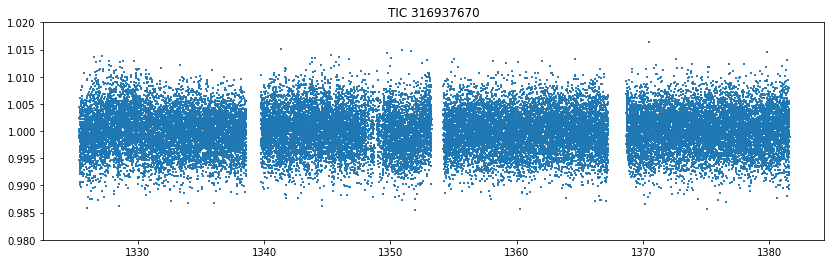

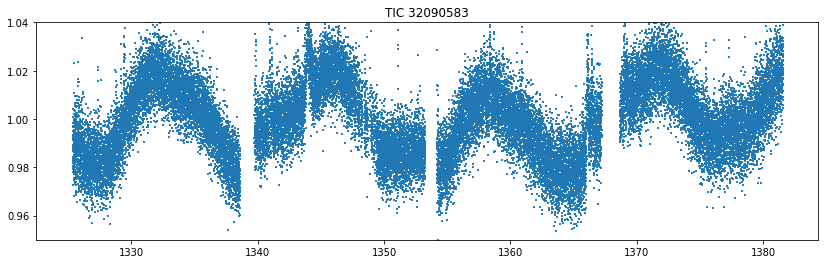

In [6]:
lightcurve_0 = LightCurve(np.concatenate([lcs[0].times, lcs[1].times]), np.concatenate([lcs[0].fluxes, lcs[1].fluxes]), lcs[0].name)
lightcurve_1 = LightCurve(np.concatenate([lcs[2].times, lcs[3].times]), np.concatenate([lcs[2].fluxes, lcs[3].fluxes]), lcs[2].name)

params_0 = dict(period=0.438335, epoch=1325.549828)
params_1 = dict(period=0.62425, epoch=1325.342966)

plt.figure(figsize=(14, 4))
lightcurve_1.plot(marker=',', s=1)
plt.ylim([0.98, 1.02])

plt.figure(figsize=(14, 4))
lightcurve_0.plot(marker=',', s=1)
#plt.ylim([0.98, 1.02])
plt.ylim([0.95, 1.04])

/Users/bmmorris/anaconda/lib/python3.5/site-packages/scipy/stats/_binned_statistic.py:621: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


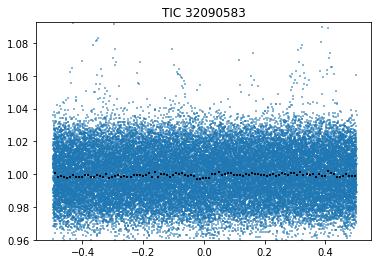

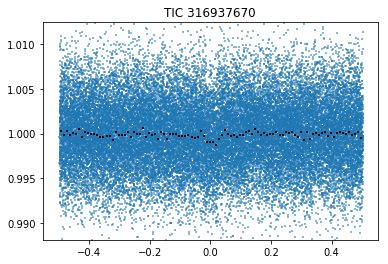

In [7]:
lightcurve_0.plot_phase_folded(params_0, marker=',', s=1, alpha=0.5)
plt.show()

lightcurve_1.plot_phase_folded(params_1, marker=',', s=1, alpha=0.5)

In [16]:
# import starry
# from scipy.optimize import minimize

# u = [1, -0.04] # Luger 2017 TRAPPIST-1

# def transit_model_0(times, p):
#     rprstar, a = p
#     star = starry.Star()
#     star[1] = u[0]
#     star[2] = u[1]

#     planet = starry.Planet(lmax=3)
#     planet.r = rprstar
#     planet.porb = params_0['period']
#     planet.a = a
#     planet.lambda0 = 90
#     planet.tref = params_0['epoch']
    
#     system = starry.System([star, planet])
#     system.compute(times)
#     return system.flux

In [17]:
# initp = [0.1, 5]
# model = transit_model_0(lightcurve_0.times, initp)
# plt.plot(lightcurve_0.times, lightcurve_0.fluxes)
# plt.plot(lightcurve_0.times, model)